In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx = 45000    # unit: m
dy = 45000
xmin = -1800000   # 100 km
xmax = 1800000
ymin = -1800000
ymax = 1800000

X, Y = np.meshgrid(np.arange(xmin, xmax+dx, dx), np.arange(ymin, ymax+dy, dy))
X.shape

(81, 81)

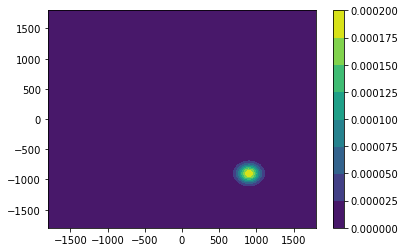

In [3]:
#vort0 = 20*10**-5 * np.exp(-(X**2+Y**2) / 10**8)
#vort0 = np.roll(vort0, shift=(-100, 100), axis=(0, 1))

vort0 = 20*10**-5 * np.exp(-(X**2+Y**2) * 5*10**-11)
vort0 = np.roll(vort0, shift=(-20, 20), axis=(0, 1))

plt.contourf(0.001*X, 0.001*Y, vort0)
plt.colorbar()

In [4]:
%%time

from model import BarotropicModel

dt = 60*4            # dt (sec) < 6*dx (km)
store_dt = 30        # store data every 2 hour
n_steps = 2160       # run model for 6 days
bm = BarotropicModel(vort0, dx, dy, dt, store_dt, n_steps)
bm.run()

Step 2160 / 2160 ...     
[Done]
CPU times: user 1.79 s, sys: 139 ms, total: 1.93 s
Wall time: 1.87 s


In [5]:
bm.vort.shape

(72, 81, 81)

(72, 81, 81)

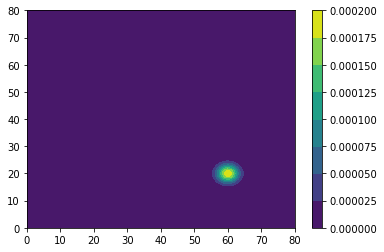

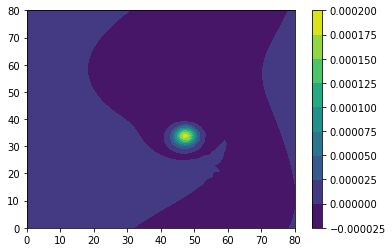

In [6]:
plt.contourf(bm.vort[0,:,:])
plt.colorbar()

plt.figure()
plt.contourf(bm.vort[-1,:,:])
plt.colorbar()

bm.vort.shape

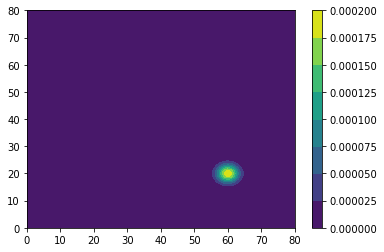

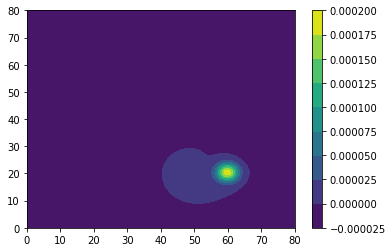

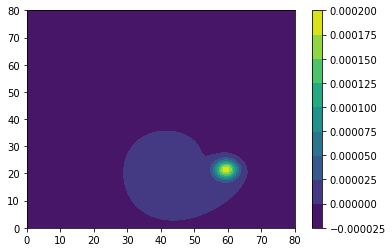

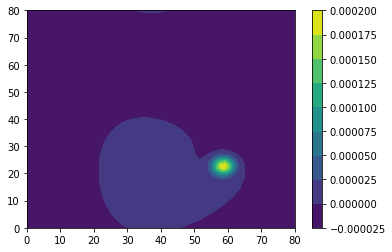

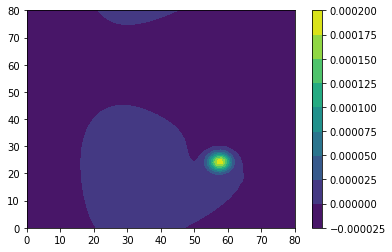

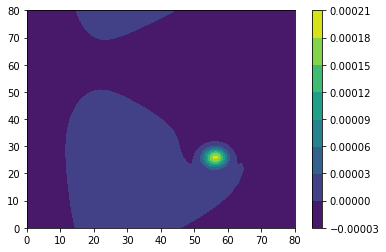

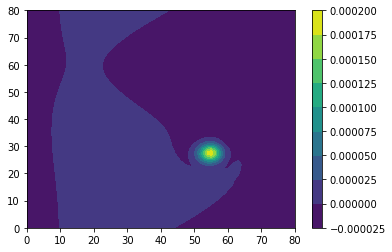

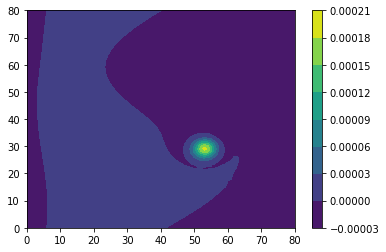

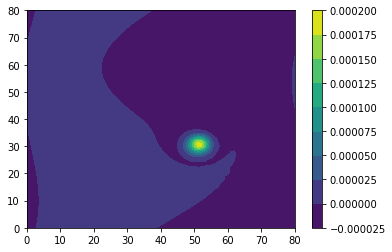

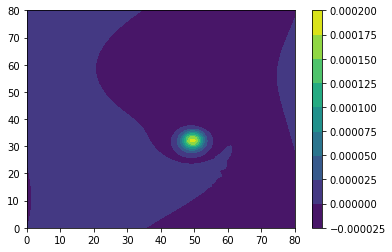

In [7]:
for ifig in range(10):
    plt.figure()
    plt.contourf(bm.vort[ifig*int(bm.vort.shape[0]/10),:,:])
    plt.colorbar()

In [8]:
aa = np.unravel_index(bm.vort[0,:,:].argmax(), bm.vort.shape[-2:])
aa

(20, 60)

In [9]:
bb = np.unravel_index(bm.vort[-1,:,:].argmax(), bm.vort.shape[-2:])
bb

(34, 47)

In [10]:
dd = np.array([dx, dy]) * (np.array(aa) - np.array(bb))
np.sqrt(np.sum(dd**2)) / (dt*n_steps)

1.6584178102901734

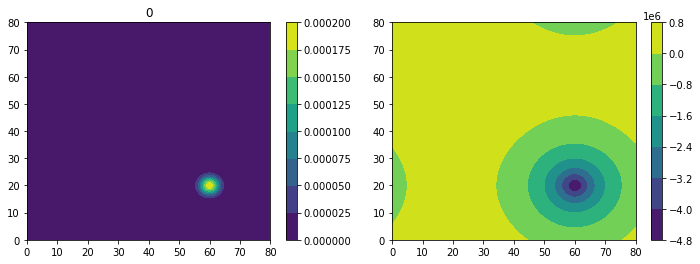

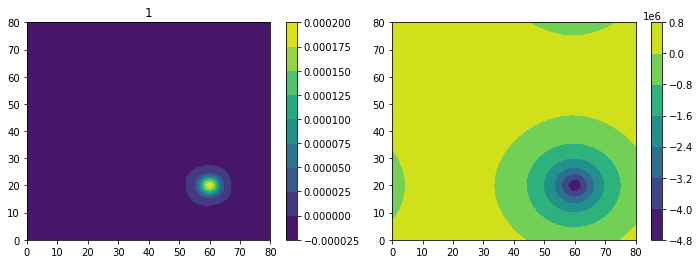

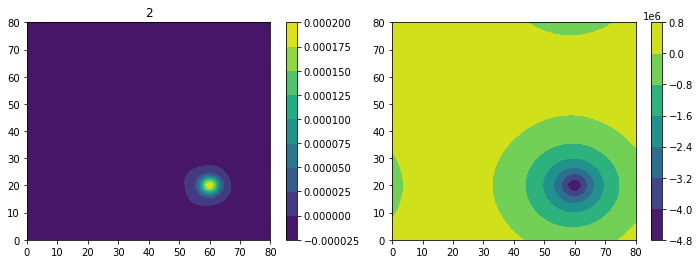

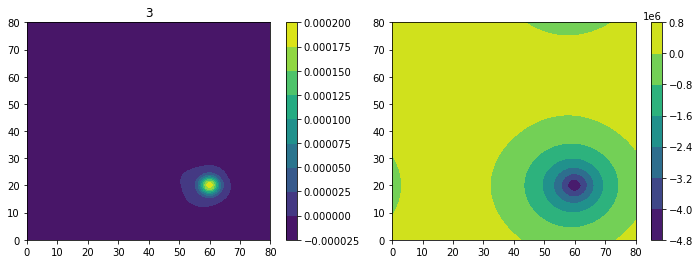

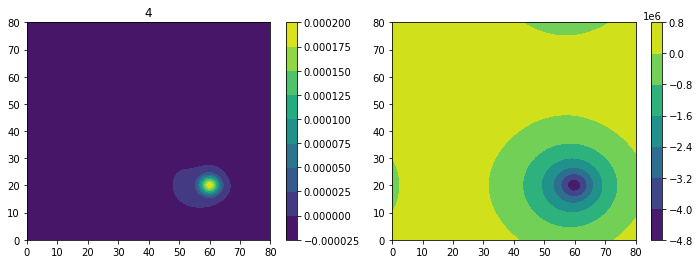

In [61]:
aa = np.fromfile('./C/test/vort.dat', dtype=np.float64).reshape(72, 81, 81)
bb = np.fromfile('./C/test/psi.dat', dtype=np.float64).reshape(72, 81, 81)

for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.contourf(aa[i])
    plt.colorbar()
    plt.title(i)
    
    plt.subplot(1, 2, 2)
    plt.contourf(bb[i])
    plt.colorbar()

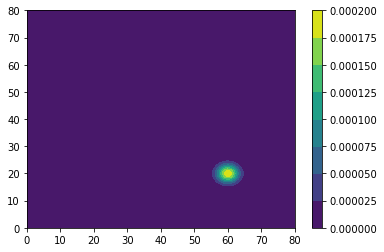

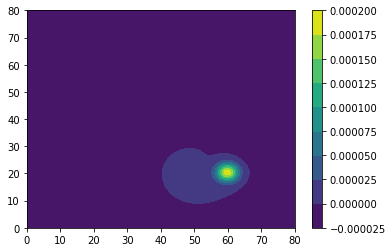

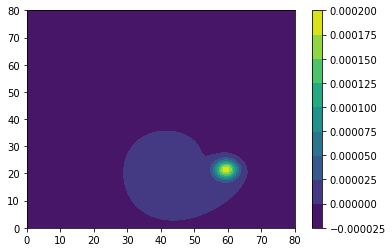

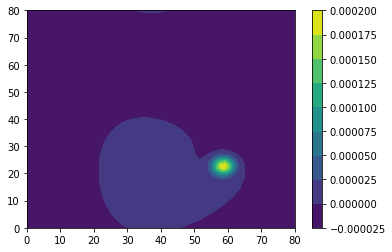

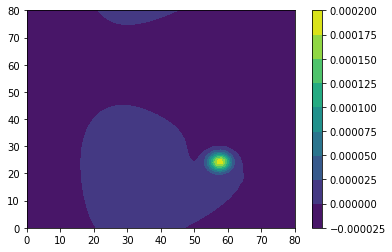

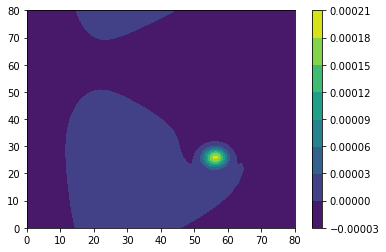

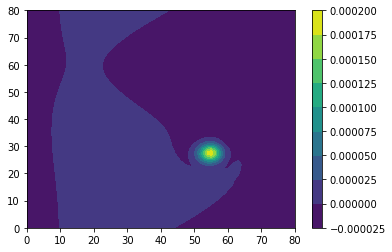

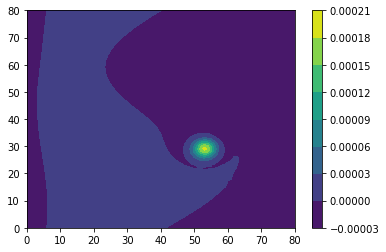

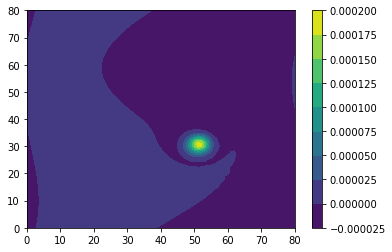

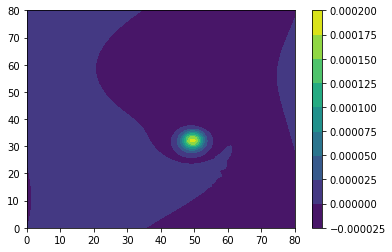

In [62]:
for ifig in range(10):
    plt.figure()
    plt.contourf(aa[ifig*int(aa.shape[0]/10),:,:])
    plt.colorbar()